# Assignement

For the assignment notebook, please enter this link.

# Import Necessary Libraries

Pytorch is the open source machine learning framework that we can use for research to production.

If you would like to study the tutorial from the offical [pytorch](https://pytorch.org/) website, please visit [this link](https://pytorch.org/tutorials/).

The source code for the entire pytorch framework can be found [here](https://github.com/pytorch).

> SideNote: pytorch seperate different task into different module. eg. there is a package called **torchaudio** that focus on audio alone.


Today we will use torchvision, which is the package inside torch, that focus on vision task. For example, for data augmentation, torchvision provide the function called **transforms**. And if you would like to use transfer learning, torchvision also provide some of the state of the art model pretrained available.

torch.nn contain the basic building blocks that we need to construct our model.<br>
For example, if we need to construct a **Convolutional Layer**, we could call the function of `torch.nn.Conv2d()` to construct that layer.

And if we want linear layer that perform the equation of $y = W^TX + b$, we could call for the function of `torch.nn.Linear()`.

If you would like to know more about `torch.nn` library, please visit this [link](https://pytorch.org/docs/stable/nn.html) for more information. Also, this [post](https://pytorch.org/tutorials/beginner/nn_tutorial.html) provide better understanding for `torch.nn`

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

# Main Components

Let's preview what will be built in this notebook.

 1. Dataset 
  - cifar10
 2. Model Architecture
  - Simple Model
 3. Loss (Update model)
  - Categorical Loss Entropy
 4. Optimizer (Regularizer)
  - Adam Optimizer
 5. Metrics (Visual for User)
  - Loss, Accuracy
 6. Save Model
  - Model Checkpoint

If you would like to change from CPU to GPU,
Select the `Runtime --> Change Runtime type` and select `GPU`.

After done selecting, we can check whether we are running GPU or CPU with the following function.

If the output show `cuda:0`, then the `GPU` is in used.

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Dataset

In this notebook, we will use `CIFAR10` dataset for classification. 

[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) is a public classification dataset, which consists of 60,000 32 * 32 color images in 10 classes. There are 50,000 training images and 10,000 testing images. 

In the following cell, we will do data augmentation for the dataset. When doing **trasnforms** on the test dataset, we only Normalize the input, that is because we do not need to augment(change) our test dataset to see the result.

Tensor is just like Numpy's ndarray, except that it can done calculation on GPU, and is modified to fit the training neural network procedure.

In [69]:
# The class names for CIFAR 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Image Normalization, Data Augmentation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                transforms.RandomRotation(30)
                                ])

test_transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5,), (0.5,))
])
train_dataset = torchvision.datasets.CIFAR10(
        './data', train=True,
        transform=transform, download=True)

test_dataset = torchvision.datasets.CIFAR10(
        './data', train=False,
        transform=test_transform, download=True
)

Files already downloaded and verified
Files already downloaded and verified


> Note: Pytorch store the image dataset in the following format:
`batch_size * dim * height * width (B*D*H*W)`.

Batch_size mean Number of images for one training iteration.
Dim mean the image dimension. Conventionally, color image have the dimension of *3* and gray scale image have the dimension of *1*.

The label value for the dataset range from `0~9`. eg. If the label is *7*, then, it would be **class_names[7] = horse**.

In [77]:
# Code Block

# Check the total number of images in train_dataset


# Plot training Image and print label


## Dataset and DataLoader

Dataset play the huge role in machine learning and deep learning. For the computer vision task, we could do data augmentation to get the effect of regulating the model, avoid being overfitting. And when training, the augmented dataset need to be fetched by the data loader. The main duty of the dataloader is to prepare dataset before feeding to the neural network.

Dataloader object is a generator object, which can be accessed through iteration.

In [38]:
train_loader = torch.utils.data.DataLoader(train_dataset, 32, shuffle=True,
                                           num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, 8, shuffle=True,
                                           num_workers=2)

In [83]:
# Code Snipptets 2

# Explain Generator

# Access train_loader

# Model

flatten equation here.

In [99]:
class SampleModel(nn.Module):
    def __init__(self):
        super(SampleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 128, 3)
        self.fc1 = nn.Linear(28*28*128, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 28*28*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [100]:
model = SampleModel()
model.to(device)


# Define Loss
criterion = nn.CrossEntropyLoss()
# Define Optimizer
optimizer = optim.Adam(model.parameters())

In [98]:
# Code Snippets 3

# Test Model


tensor([[-0.0592, -0.0659,  0.0515,  0.0013,  0.0012, -0.0716, -0.1198,  0.0276,
         -0.0834, -0.0727]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
EPOCH = 10

for epoch in range(EPOCH):
    loss_epoch = 0
    total_imgs = 0
    correct = 0
    for i, data in enumerate(train_loader):
        imgs, labels = data[0].to(device), data[1].to(device)

        # Clear-out Gradients
        optimizer.zero_grad()

        # Predict from the input images
        predicts = model(imgs)

        # Calculate Loss
        loss = criterion(predicts, labels)

        # Calculate Gradient
        loss.backward()
        # Update Model Parameters
        optimizer.step()

        # log loss for evaluate model training performance.
        loss_epoch += loss.item()

        total_imgs += len(imgs)
        correct += (torch.argmax(predicts, 1)==labels).sum().item()
    
    acc = (correct/total_imgs)*100
    print(f"EPOCH : {epoch}, Acc : {acc:.2f}, Loss : {loss:.2f}")

EPOCH : 0, Acc : 48.44, Loss : 1.18
EPOCH : 1, Acc : 61.13, Loss : 0.63
EPOCH : 2, Acc : 66.28, Loss : 0.61
EPOCH : 3, Acc : 70.82, Loss : 0.77


In [ ]:
# Code Snippets 4
# Play with model.state_dict

In [ ]:
# Saving Model

# Checkpoint
ckpt_path = 'checkpoint.pt'

torch.save(model.state_dict(), ckpt_path)

In [ ]:
# Save the model to drive

In [ ]:
model = SampleModel().to(device)
checkpoint = torch.load(ckpt_path)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [41]:
softmax = nn.Softmax(dim=0)
# Test Dataset accuracy:
num_total = 0
num_correct = 0
with torch.no_grad():
    for i, data in enumerate(test_loader):
        image, label = data
        image = image.to(device)
        label = label.to(device)

        predict = model(image)
        predict_class = torch.argmax(predict, 1)
        correct = (predict_class == label)


        num_correct += correct.sum().item()
        num_total += len(image)
        
print(num_correct, num_total)

7093 10000


In [42]:
print("Accuracy : ", num_correct/num_total)

Accuracy :  0.7093


torch.Size([8, 10])


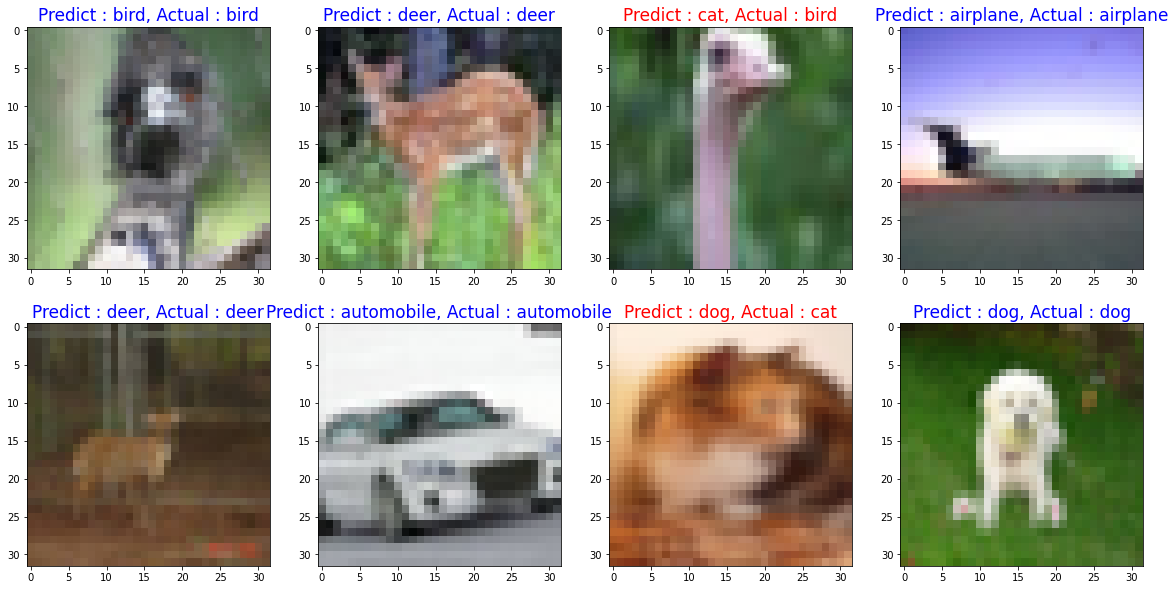

In [49]:
# Helper Function to show your testing accuracy.

def test_model(model):
    data = next(iter(test_loader))
    imgs, labels = data[0].to(device), data[1]
    predicts = model(imgs)
    print(predicts.size())
    index = torch.argmax(predicts, 1)
    titles = []
    for i in index:
        titles.append(class_names[i])
    plt.figure(figsize=(20,10))
    for i in range(len(titles)):
        title = f"Predict : {titles[i]}, Actual : {class_names[labels[i]]}"
        if titles[i]==class_names[labels[i]]:color = 'blue'
        else:color='red'
        img = (imgs[i].cpu().numpy()/2)+0.5
        plt.subplot(2, 4, i+1)
        plt.imshow(img.transpose(1, 2, 0));plt.title(title, fontdict={'fontsize':17, 'color':color})

test_model(model)

In [ ]:
# # Code Snippet 1

# print(len(train_dataset))

# # img_ind ~ 0~4,999
# # 
# img_ind = 60
# image = train_dataset[img_ind][0].numpy()
# label = train_dataset[img_ind][1]

# image = image.transpose(1, 2, 0)
# print(class_names[label])
# plt.imshow(image)
# plt.show()

In [ ]:
# # Code Snipptets 2

# # Explain Generator

# # Access train_loader
# for data in train_loader:
#     print(data[0].size())
#     print(data[1].size())
#     break

In [ ]:
# # Code Snippets 3

# # Test Model
# input_images = torch.rand(1, 3, 32, 32).to(device)
# prediction = model(input_images)
# prediction